<a href="https://colab.research.google.com/github/roapple10/Python-learning-note/blob/main/Linear_Regression_to_predict_the_profit_of_1000_companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
# Importing the dataset and Extracting the Independent and Dependent variables
companies = pd.read_csv('1000_Companies.csv')
y = companies.iloc[:, 4].values

X = pd.get_dummies(companies.iloc[:, :-1])
X


,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.800,471784.1000,0,0,1
1,162597.70,151377.590,443898.5300,1,0,0
2,153441.51,101145.550,407934.5400,0,1,0
3,144372.41,118671.850,383199.6200,0,0,1
4,142107.34,91391.770,366168.4200,0,1,0
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,1,0,0
996,134970.00,130390.080,329204.0228,1,0,0
997,100275.47,241926.310,227142.8200,1,0,0
998,128456.23,321652.140,281692.3200,1,0,0


In [ ]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

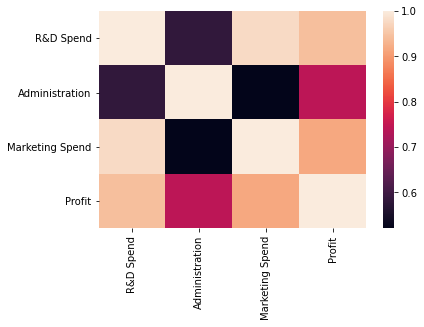

In [ ]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(companies.corr())

In [ ]:
# Encoding categorical data
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()
#X[:, 3] = labelencoder.fit_transform(X[:, 3]) #state
#onehotencoder = OneHotEncoder(categorical_features = [3])
#onehotencoder = OneHotEncoder(categories='auto')
#X = onehotencoder.fit_transform(X).toarray()
# Avoiding the Dummy Variable Trap
#X = X[:, 1:]

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 93778.52855584,  96791.92701195, 136306.03970916, 103229.62221131,
        61488.39956343,  70372.15640544,  53951.44204804, 154782.10443185,
        80022.47373426, 168451.26344486,  91128.22756079, 160363.03214775,
       116949.92683909, 114670.49710844, 101170.78393178,  77145.81206512,
       128962.24791419, 161248.15565012, 124785.54599662, 160254.16591951,
       165374.68928316, 131667.37939921, 161668.75060253, 162885.0478457 ,
        94188.56161417, 109654.6897425 ,  82404.77680277, 145591.14917271,
       150031.62787453, 150377.97338465, 185101.77406828, 109710.07671309,
       143741.91983367,  86717.55296975,  58321.33595586,  79730.62371578,
       173922.25648486, 162148.14241453, 128833.12323526, 125244.01647081,
       111306.6029038 ,  95256.66890678,  72375.78444212, 169212.63152488,
       141250.1938311 , 101135.09869817,  51261.04885431,  78380.94561488,
       181625.57804741, 120086.10316998,  83395.19894857, 172160.25785193,
       185294.27746218,  

In [ ]:
# Calculating the Coefficients
print(regressor.coef_)

[ 5.52993844e-01  1.08665448e+00  7.87486715e-02  2.33095626e+02
 -5.21755075e+02  2.88659449e+02]


In [ ]:
# Calculating the Intercept
print(regressor.intercept_)

-77109.328982063


In [ ]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9703077302505063